#Maquinas de vectores de soporte (Super Vector Machine SVM) - BILL AUTHENTICATION


##P1-Importar librerias

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##P2-Importando el dataset

In [6]:
## Con ese link no es necesario descargar el dataset en google drive
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##P3-Conociendo los datos

###¿Existen valores nulos?

In [3]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

###P3.1.Descripción del dataset

In [4]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


###P3.2.Graficamos datos

####Matriz de correlación

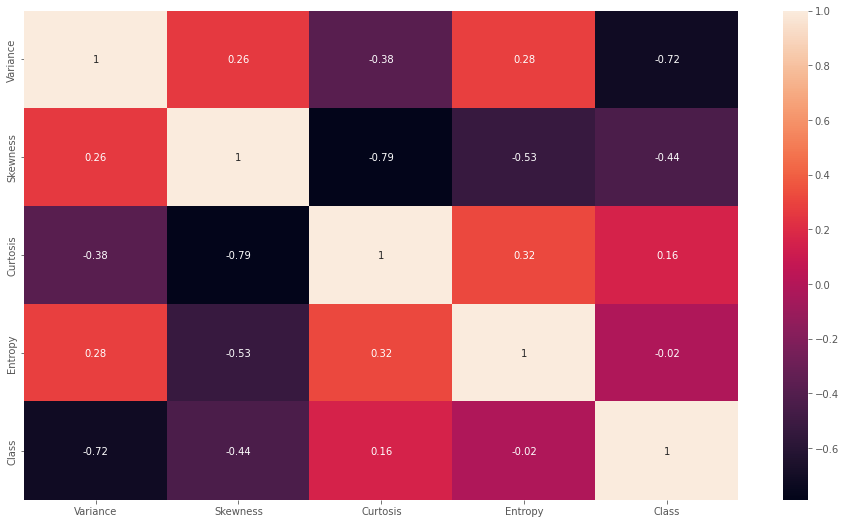

In [7]:
correlation_matrix = df.corr().round(2)
sbn.heatmap(data=correlation_matrix,annot=True)

####Gráfica Billetes falsos VS Verdaderos

Text(0.5, 0, 'Falso o verdadero')

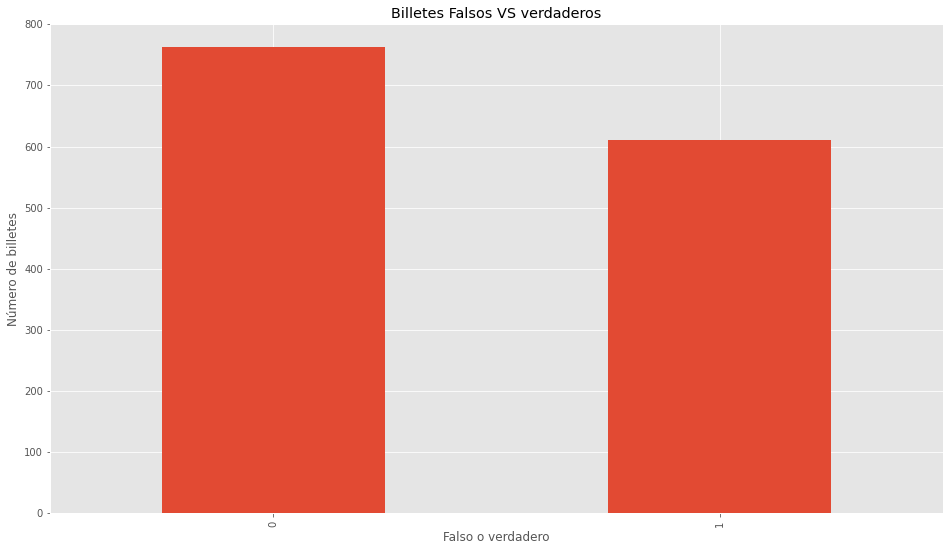

In [8]:
bill = df.groupby(['Class']).size()
bill.plot.bar().grid(True)
plt.ylabel("Número de billetes")
plt.title("Billetes Falsos VS verdaderos")
plt.xlabel("Falso o verdadero")

####Graficando todos los datos

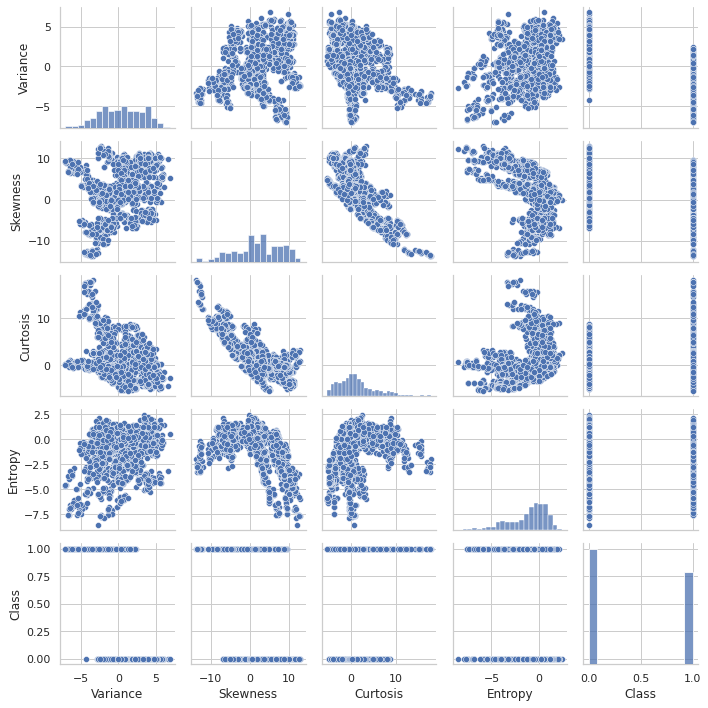

In [9]:
sbn.set(style="whitegrid", context="notebook")
plot_data=df.columns
sbn.pairplot(df[plot_data],height=2.0)
plt.tight_layout()
plt.show()

Debido a que la variable a predecir, `class`, es discreta y sus únicos valores son 0 o 1, los modelos que se pueden utilizar son:
- Regresión logística
- Árbol de decisión de clasificación
- **SVM**


##P4-Separación de los datos en `x `y `y`

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

###P4.1 separar el dataset de la siguiente forma:
- 80% de entrenamiento
- 20% de prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

##P5 Creamos la instancia de SVM

In [26]:
#existen varios tipos de kernel:
# linear (dos grupos)
# sigmoidal (clasificación binaria)
# polinómico (varios grupos)
# gaussiano radial (separación de grupos radiales como un k-means)

svm_class = SVC(kernel='linear')
#Kernel polinómico
#svclassifier = SVC(kernel='poly', degree=8)
#Kernel gaussiano
svclassifier = SVC(kernel='rbf')
#Kernel sigmoide
#svclassifier = SVC(kernel='sigmoid')

##P6-Entrenamiento

In [27]:
svm_class.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##P7- Resultados

In [28]:
# primero generamos las predicciones
y_pred = svm_class.predict(X_test)

## calculamos el accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: ', round(accuracy*100, 2), '%')

Precisión:  98.79 %


###Realizamos algunas predicciones

In [ ]:
billetes=np.array([[-5,10,15.9,-5.24],[5,11,-2.2,0.5],[-1.97250,2.88250,-2.30860,-2.37240],[-2.91380,-9.47110,9.76680,-0.60216]])
x_nuevo=pd.DataFrame(billetes, columns=['variance','skewness','curtosis','emtropy'])
y_prediccion=svm_class.predict(x_nuevo)
print(y_prediccion)

[0 0 1 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Los dos primeros valores agregados al array billetes fueron escritos al azar, mientras que los dos últimos son valores que se encuentran en el dataset original; estos deben clasificarse en la clase 1 según el dataset original y como podemos evidenciar, se predijeron correctamente.



#SVM Load_breast_cancer()

##P1.importanto librerias

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

##P2. cargando datos

In [ ]:
from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()

df_cancer = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df_cancer.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



##P3. conociendo los datos

In [ ]:
df_cancer.isnull().sum()

In [ ]:
df_cancer.describe()

###P3.1 graficando

In [ ]:
sbn.set(style="whitegrid", context="notebook")
plot_data=df_cancer.columns
sbn.pairplot(df_cancer[plot_data],height=2.0)
plt.tight_layout()
plt.show()

##P4.Separando los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=42)

##P5.creando instancia de SVM

In [ ]:
svm_cancer = svm.SVC(kernel="linear")

##P6.entrenamos

In [ ]:
svm_cancer.fit(X_train,y_train)

##P7.predecimos

In [ ]:
pred = svm_cancer.predict(X_test)

##P8.resultados

In [ ]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

#SVM reconocimento facial

##P1.Importando librerias

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Reducción de la dimensionalidad lineal utilizando la descomposición aproximada del valor singular de los datos 
from sklearn.decomposition import PCA as RandomizedPCA
#canalización a partir de los estimadores dados
from sklearn.pipeline import make_pipeline

import seaborn as sbn
import matplotlib.pyplot as plt
#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##P2. importando/descargar dataset (caras de personas)

In [30]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [31]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


##P3.Conociendo los datos

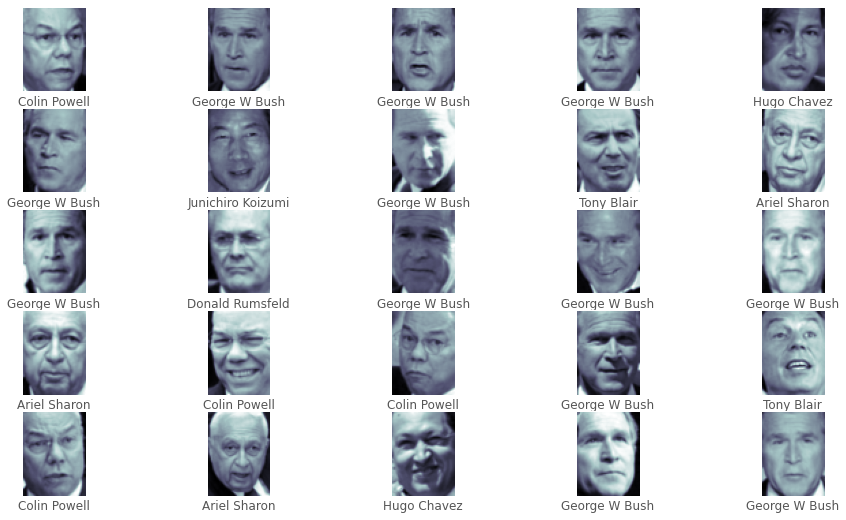

In [32]:
#creamos un grafico (5x5)
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Cada imagen contiene [62 x 47] o casi 3.000 píxeles.

##P4. Preprocesando las imagenes

In [33]:
#creamos un preprocedor para extraer 150 componentes fundamentales (R,G,B,alpha)
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svm_imagen = SVC(kernel='rbf', class_weight='balanced')
#empaquetamos el preprocesador y el clasificador en una sola canalización
model = make_pipeline(pca, svm_imagen)

##P5. separando los datos

In [34]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

##P6. entrenamos

usaremos una validación cruzada de búsqueda de cuadrícula para explorar combinaciones de parámetros. Aquí ajustaremos (que controla la dureza del margen) y (que controla el tamaño del núcleo de la función de base radial), y determinaremos el mejor modelo:Cgamma

In [35]:
from sklearn.model_selection  import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 10s, sys: 38.6 s, total: 1min 49s
Wall time: 1min 5s
{'svc__C': 10, 'svc__gamma': 0.001}


In [36]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

##P7. predecimos

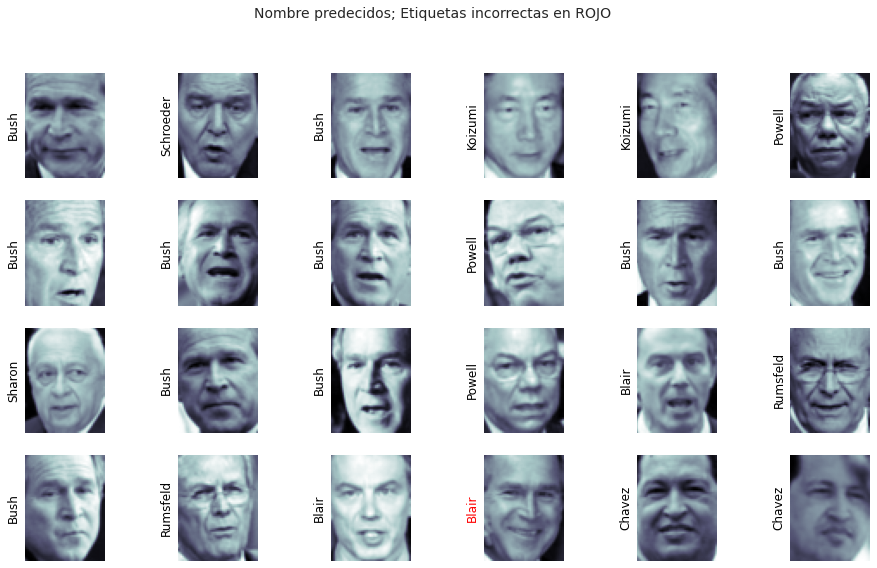

In [37]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Nombre predecidos; Etiquetas incorrectas en ROJO', size=14);

##P8.resultados

In [ ]:
#informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



matriz de confusión entre estas clases

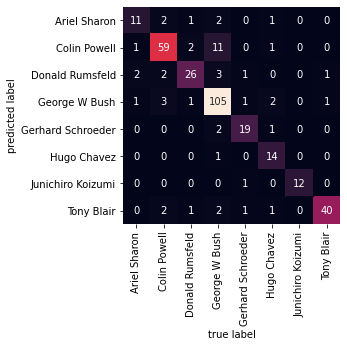

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sbn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

con las etiquetas es probable que sean confundidas por el estimador.
Para este tipo de aplicación, una buena opción es hacer uso de OpenCV